In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

print('Great success!!!')

Great success!!!


In [148]:
# Util Funks to visualize the negative progress

def show_image(image):
    cv2.imshow('image',image)
    c = cv2.waitKey()
    if c >= 0 : return -1
    return 0
   
def draw_contours(src_img, contours):
    img_cpy = src_img.copy()
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img_cpy, (x, y), (x+w, y+h), (255,0,0), 3)
        
        return img_cpy


In [154]:
eq_test_img_path = "../FirstModel/TestImages/testimg1.jpg" 
eq_tester =  cv2.imread(eq_test_img_path)

# Convert to gray scale, and invert 
# want features to be wihte on blackbackground ==> helps network be more accurate
toGray = cv2.cvtColor(eq_tester, cv2.COLOR_BGR2GRAY)
invGray = ~toGray

# Gaussian blur helps make the image bimodial by removoving noise
# bimodal image = better Otsu thresholding!!!!
blur = cv2.GaussianBlur(invGray,(5,5),0)

In [156]:
T1, thresh1 = cv2.threshold(invGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
T2, thresh2 = cv2.threshold(invGray, 127, 255, cv2.THRESH_BINARY)
T3, thresh3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
T4, thresh4 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

thresh5 = cv2.adaptiveThreshold(invGray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,99,1)
thresh6 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,107,0)
thresh7 = cv2.adaptiveThreshold(invGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,99,3)
thresh8 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,99,3)

print(T1)
print(T3)

79.0
77.0


x:356, y:297, w:153, h:146
x:684, y:282, w:146, h:185
x:137, y:281, w:29, h:221


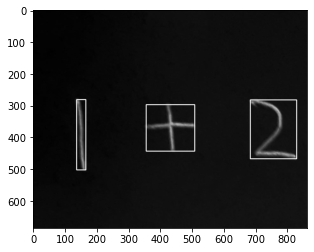

In [146]:
thresh6 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
contours6, _ = cv2.findContours(thresh3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
result = blur.copy()

for c in contours6:
    rect = cv2.boundingRect(c)
    x, y, w, h = rect
    cv2.rectangle(blur,(x,y),(x+w, y+h), (255,0,255),2)
    print(f"x:{x}, y:{y}, w:{w}, h:{h}")
# plt.close(3);plt.figure(3)
# plt.imshow(thresh6,cmap="gray")
# plt.show()

plt.figure(3);plt.close(3)
plt.imshow(blur, cmap="gray")
plt.show()

Text(0.5, 1.0, 'adaptive gaussian on blurr')

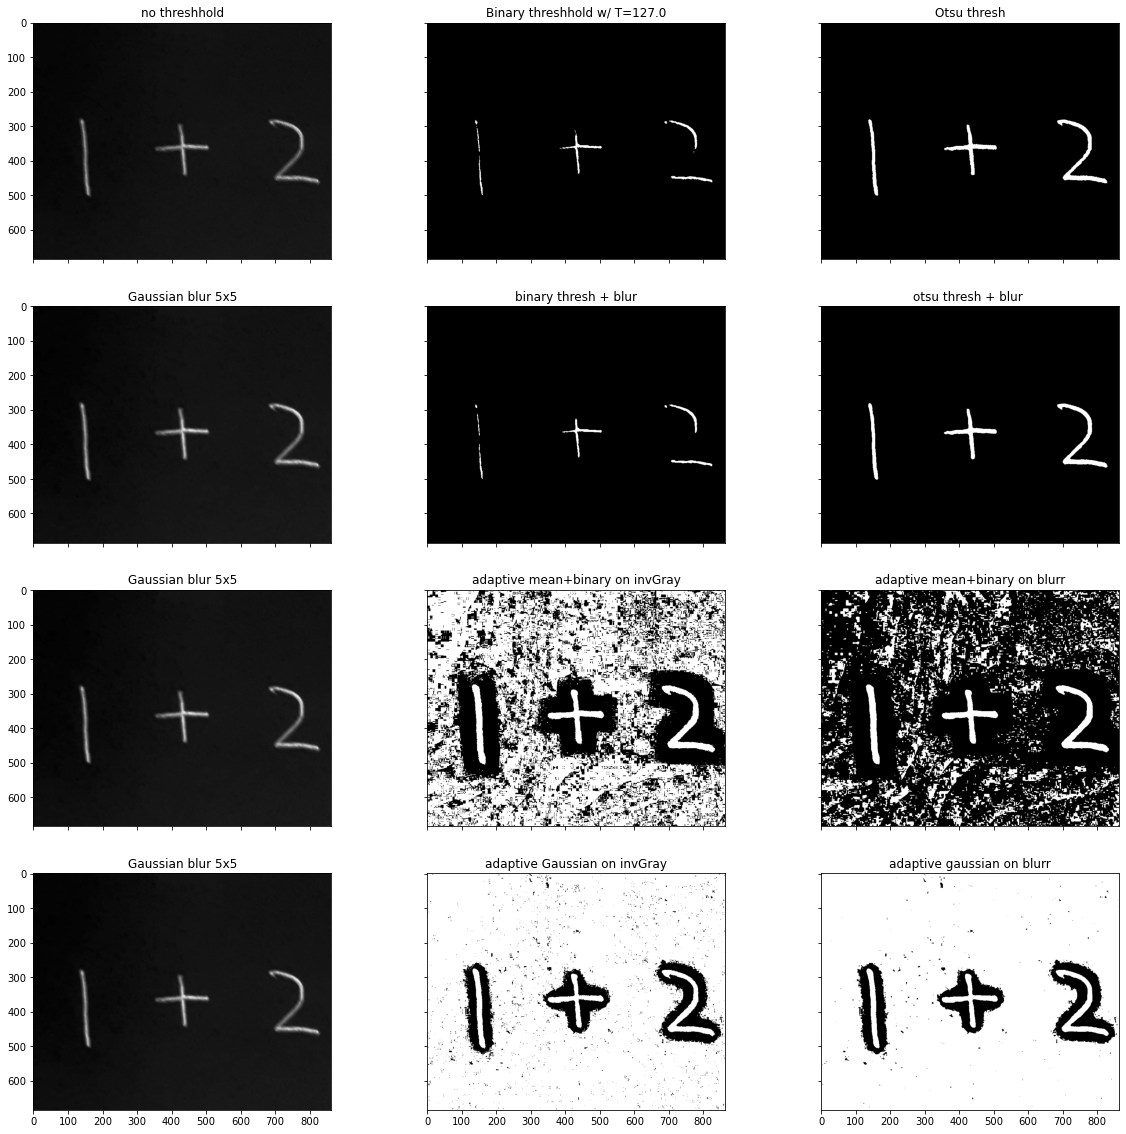

In [159]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,20), sharey=True, sharex=True,)
#plt.subplots_adjust(wspace=0.05, hspace=-0.5)
ax[0][0].imshow(invGray, cmap="gray")
ax[0][0].set_title('no threshhold')
ax[0][1].imshow(thresh2, cmap="gray")
ax[0][1].set_title(f'Binary threshhold w/ T={T2}')
ax[0][2].imshow(thresh1, cmap="gray")
ax[0][2].set_title('Otsu thresh')

ax[1][0].imshow(blur, cmap='gray')
ax[1][0].set_title("Gaussian blur 5x5")
ax[1][1].imshow(thresh4, cmap='gray')
ax[1][1].set_title("binary thresh + blur")
ax[1][2].imshow(thresh3, cmap='gray')
ax[1][2].set_title("otsu thresh + blur ")

ax[2][0].imshow(blur, cmap='gray')
ax[2][0].set_title("Gaussian blur 5x5")
ax[2][1].imshow(thresh5, cmap='gray')
ax[2][1].set_title("adaptive mean+binary on invGray")
ax[2][2].imshow(thresh6, cmap='gray')
ax[2][2].set_title("adaptive mean+binary on blurr")

ax[3][0].imshow(blur, cmap='gray')
ax[3][0].set_title("Gaussian blur 5x5")
ax[3][1].imshow(thresh7, cmap='gray')
ax[3][1].set_title("adaptive Gaussian on invGray")
ax[3][2].imshow(thresh8, cmap='gray')
ax[3][2].set_title("adaptive gaussian on blurr")

In [158]:
plt.close(fig)